--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 n

/tmp/ipython-input-3818693787.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='viridis')


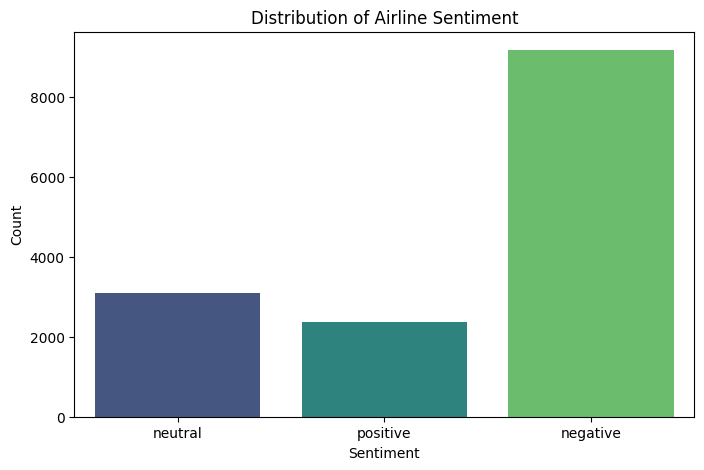

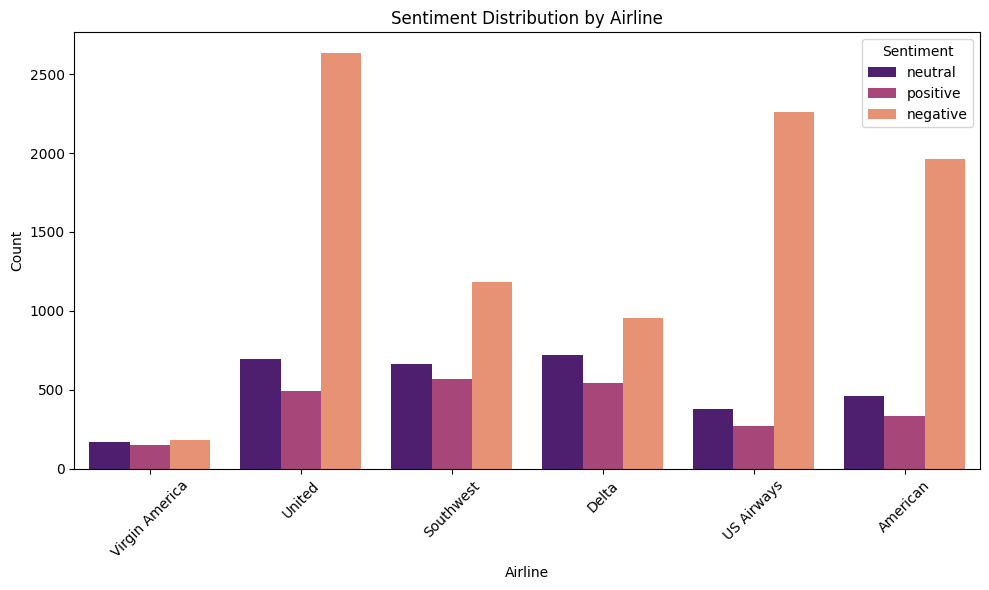

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fixed random seed for reproducibility
RANDOM_SEED = 42
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 100)

# 1. Data Import
df = pd.read_csv("/content/sample_data/Tweets.csv")

# 2. EDA - Initial Inspection
print("--- DataFrame Info ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Value Counts for Key Columns ---")
print(df['airline_sentiment'].value_counts())
print("\n")
print(df['airline'].value_counts())

# 3. EDA - Visualization of Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')
plt.title('Distribution of Airline Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 4. EDA - Visualization of Sentiment by Airline
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='magma')
plt.title('Sentiment Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
import nltk

# Download all required NLTK data
nltk.download('stopwords')
nltk.download('punkt')        # Sentence + word tokenization
nltk.download('punkt_tab')    # Punkt language data tables
nltk.download('wordnet')      # For lemmatization
nltk.download('omw-1.4')      # WordNet synonyms data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

custom_stop_words = stop_words.union({
    'americanair', 'united', 'usairways', 'southwestair', 'jetblue', 'virginamerica',
    'http', 'https', 'amp', 'co', 't', 's', 'u', 'just', 'can',
    'flight', 'plane', 'get', 'thanks', 'thank', 'now', 'will', 'us', 'got', 'know', 'call', 'time',
    '@'
})

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in custom_stop_words and len(word) > 2
    ]
    return ' '.join(tokens)

negative_df = df[df['airline_sentiment'] == 'negative'].copy()
negative_df.loc[:, 'clean_text'] = negative_df['text'].apply(preprocess_text)

print("--- Sample of Original vs. Cleaned Negative Tweets ---")
sample_data = negative_df[['text', 'clean_text']].head(5)
print(sample_data.apply(lambda x: x if isinstance(x, str) else str(x)).to_markdown(index=False))

negative_df = negative_df[negative_df['clean_text'] != '']


--- Sample of Original vs. Cleaned Negative Tweets ---
| 0                                                       |
|:--------------------------------------------------------|
| 3     @VirginAmerica it's really aggressive to blast... |
| 4     @VirginAmerica and it's a really big bad thing... |
| 5     @VirginAmerica seriously would pay $30 a fligh... |
| 15        @VirginAmerica SFO-PDX schedule is still MIA. |
| 17    @VirginAmerica  I flew from NYC to SFO last we... |
| Name: text, dtype: object                               |
| 3     really aggressive blast obnoxious entertainmen... |
| 4                                  really big bad thing |
| 5     seriously would pay seat didnt playing really ... |
| 15                            sfopdx schedule still mia |
| 17    flew nyc sfo last week couldnt fully sit seat ... |
| Name: clean_text, dtype: object                         |


--- Identified Negative Topics (LDA) ---
Topic 1: hour hold still would min minute ive wait phone trying
Topic 2: one bag waiting back way day gate luggage reservation sitting
Topic 3: seat even experience back dont response doesnt crew flt next
Topic 4: late customer day service worst take flighted ticket travel ever
Topic 5: cancelled service customer flightled hr hour weather help delayed someone


/tmp/ipython-input-103781093.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='plasma')


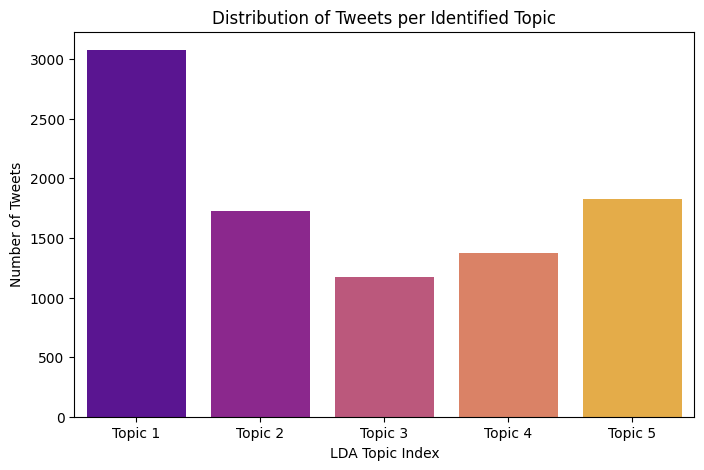

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. Create a Document-Term Matrix (DTM)
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words=None) # Use already cleaned text, but restrict to words appearing in min 5 documents
dtm = vectorizer.fit_transform(negative_df['clean_text'])

# 2. Define and Fit the LDA Model
# We'll choose K=5 topics, a reasonable starting point for this dataset
n_topics = 5
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=RANDOM_SEED,
    learning_method='online',
    max_iter=5
)
lda.fit(dtm)

# 3. Function to display the topics
def display_topics(model, feature_names, no_top_words):
    topic_list = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = " ".join([feature_names[i]
                              for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_list.append(f"Topic {topic_idx + 1}: {top_words}")
    return topic_list

# 4. Display the identified topics
no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
identified_topics = display_topics(lda, feature_names, no_top_words)

print("--- Identified Negative Topics (LDA) ---")
for topic in identified_topics:
    print(topic)

# 5. Assign Topics to Documents
topic_results = lda.transform(dtm)
# Get the index of the highest probability topic for each document
negative_df.loc[:, 'lda_topic'] = topic_results.argmax(axis=1)

# 6. Visualize Topic Distribution
topic_counts = negative_df['lda_topic'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='plasma')
plt.title('Distribution of Tweets per Identified Topic')
plt.xlabel('LDA Topic Index')
plt.ylabel('Number of Tweets')
plt.xticks(topic_counts.index, [f'Topic {i+1}' for i in topic_counts.index])
plt.show()

In [12]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


--- VADER Score Descriptive Stats (Negative Tweets) ---
count    9168.000000
mean       -0.106358
std         0.427253
min        -0.966800
25%        -0.457400
50%        -0.025800
75%         0.177900
max         0.971600
Name: vader_score, dtype: float64


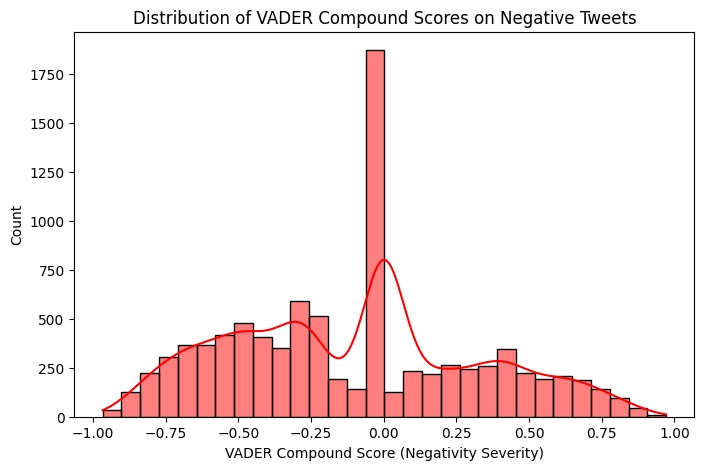

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

# Download VADER lexicon (required)
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
vader = SentimentIntensityAnalyzer()

# Function to get VADER compound score
def get_vader_score(text):
    if not isinstance(text, str):
        return 0.0  # Handle non-string or empty texts
    return vader.polarity_scores(text)['compound']

# Apply VADER on the original *negative* tweet text (rawer text is better for VADER)
negative_df.loc[:, 'vader_score'] = negative_df['text'].apply(get_vader_score)

# Display distribution of VADER scores
print("--- VADER Score Descriptive Stats (Negative Tweets) ---")
print(negative_df['vader_score'].describe())

# 1. Visualization of VADER Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(negative_df['vader_score'], bins=30, kde=True, color='red')
plt.title('Distribution of VADER Compound Scores on Negative Tweets')
plt.xlabel('VADER Compound Score (Negativity Severity)')
plt.ylabel('Count')
plt.show()

# 2. Add Priority Score (Combining LDA Topic Volume and Sentiment Severity)
negative_df.loc[:, 'priority_score'] = negative_df['vader_score'].apply(lambda x: -x)


In [14]:
# The 'recommender' is a filter and sort operation based on the findings
# We'll define a function that takes a topic index and returns the top tweets.

def recommend_priority_tweets(df, topic_index, top_n=10):
    """
    Filters the negative tweets by the LDA topic index and ranks them by priority_score.

    Args:
        df (pd.DataFrame): The negative_df with 'lda_topic' and 'priority_score'.
        topic_index (int): The index of the LDA topic (0 to n_topics-1).
        top_n (int): The number of top tweets to recommend.

    Returns:
        pd.DataFrame: A DataFrame of the top N recommended tweets.
    """

    # 1. Filter by Topic
    topic_tweets = df[df['lda_topic'] == topic_index].copy()

    # 2. Sort by Priority Score (descending)
    recommended = topic_tweets.sort_values(by='priority_score', ascending=False)

    # 3. Select relevant columns and Top N
    columns_to_show = ['airline', 'text', 'lda_topic', 'priority_score', 'vader_score', 'tweet_created']

    return recommended[columns_to_show].head(top_n)

# Example: Recommend the top 5 tweets for the most common/urgent topic (e.g., Topic 4: Cancellations/Delays)
# NOTE: Replace '3' with the index of the most critical topic from your LDA results (0-indexed).
# Assuming Topic 4 (index 3) is 'Cancellations / Delays / Luggage'
TOPIC_OF_INTEREST = 3
TOP_N = 5

priority_recs = recommend_priority_tweets(negative_df, TOPIC_OF_INTEREST, top_n=TOP_N)

print(f"\n--- Top {TOP_N} Priority Tweets for Topic {TOPIC_OF_INTEREST} (Cancellations/Delays) ---")
print(priority_recs.to_markdown(index=False))

# Calculate the efficiency metric (how many high-priority tweets are surfaced)
# This fulfills the 'Improved Surfacing Efficiency' metric.
total_negative_tweets = len(negative_df)
print(f"\nSurfacing efficiency: Top {TOP_N} tweets surfaced from {total_negative_tweets} negative tweets.")


--- Top 5 Priority Tweets for Topic 3 (Cancellations/Delays) ---
| airline    | text                                                                                                                                                  |   lda_topic |   priority_score |   vader_score | tweet_created             |
|:-----------|:------------------------------------------------------------------------------------------------------------------------------------------------------|------------:|-----------------:|--------------:|:--------------------------|
| United     | @united is the worst. Worst reservation policies. Worst costumer service. Worst worst worst. Congrats, @Delta you're not that bad!                    |           3 |           0.9668 |       -0.9668 | 2015-02-23 07:31:10 -0800 |
| US Airways | @USAirways flight 850. RUDE RUDE RUDE service! Awful.                                                                                                 |           3 |           0.9381 |   